In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from arch import arch_model
import matplotlib.pyplot as plt
from itertools import product

In [2]:
with pd.HDFStore('data.h5') as hdf:
    data = hdf['data_rsi_filtre2']

In [3]:
data['parkinson_sma_H'] = data.groupby(level='symbol', as_index=False)['parkinson'].rolling(200).mean().drop(['symbol'], axis=1)
data['parkinson_sma_L'] = data.groupby(level='symbol', as_index=False)['parkinson'].rolling(20).mean().drop(['symbol'], axis=1)
data['parkinson_spread'] = (data.parkinson_sma_L - data.parkinson_sma_H) / data.parkinson_sma_H

In [4]:
data.columns

Index(['tick_volume', 'spread', 'momentum_30p', 'momentum_60p',
       'momentum_120p', 'momentum_240p', 'momentum_480p', 'momentum_1060p',
       'momentum_2120p', 'momentum_3180p', 'ema_spread20', 'ema_accel_1p',
       'ema_accel_5p', 'ema_accel_10p', 'ema_accel_30p', 'rsi',
       'log_returns_lag_0p', 'log_returns_lag_1p', 'log_returns_lag_2p',
       'log_returns_lag_3p', 'log_returns_lag_4p', 'log_returns_lag_5p',
       'log_returns_lag_6p', 'log_returns_lag_7p', 'log_returns_lag_8p',
       'log_returns_lag_9p', 'rolling_std_50w', 'parkinson', 'ticker_token',
       'target_1p', 'target_5p', 'target_10p', 'target_30p', 'target_60p',
       'target_120p', 'target_240p', 'parkinson_sma_H', 'parkinson_sma_L',
       'parkinson_spread'],
      dtype='object')

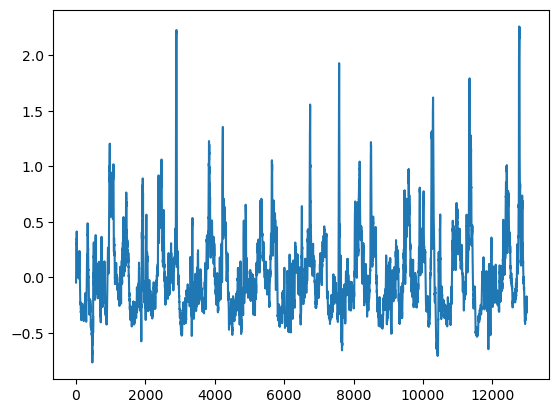

In [5]:
plt.plot(((data.parkinson_sma_L - data.parkinson_sma_H) / data.parkinson_sma_H ).loc['EURCAD'].dropna().values[7000:20000])

In [8]:
rsi_thr = [(25, 75)]
vol_thr = [1]
targets = ['target_1p']
list_opt = []
for (rsi_low, rsi_high), vol, target in product(rsi_thr, vol_thr, targets):
    data_filter = data[((data.rsi < rsi_low) | (data.rsi > rsi_high)) & (data.parkinson_spread > vol)]
    corr = data_filter.corr(method='pearson').loc[target].abs().sort_values().drop(['target_1p',
                                                                                          'target_5p',
                                                                                          'target_10p',
                                                                                          'target_60p',
                                                                                          'target_120p',
                                                                                          'target_240p',
                                                                                          'target_30p',
                                                                                          'ticker_token']).mean()
    size = len(data_filter)
    list_opt.append([(rsi_low, rsi_high, vol, target), corr, size])

In [9]:
data_filter.corr(method='pearson').loc['target_1p'].sort_values().drop(['target_1p',
                                                                         'target_5p',
                                                                         'target_10p',
                                                                         'target_60p',
                                                                         'target_30p',
                                                                         'target_120p',
                                                                         'target_240p',
                                                                         'ticker_token'])

log_returns_lag_0p   -0.147882
log_returns_lag_1p   -0.133829
log_returns_lag_7p   -0.084335
ema_accel_1p         -0.061168
log_returns_lag_8p   -0.055292
rsi                  -0.045936
momentum_30p         -0.036775
momentum_60p         -0.035092
momentum_120p        -0.030762
momentum_240p        -0.026376
momentum_480p        -0.023332
momentum_1060p       -0.013228
momentum_3180p       -0.012944
ema_accel_10p        -0.010924
parkinson_spread     -0.010543
log_returns_lag_6p   -0.008961
ema_accel_30p        -0.008904
momentum_2120p       -0.003564
log_returns_lag_9p    0.002418
ema_accel_5p          0.006787
parkinson_sma_L       0.016303
ema_spread20          0.020973
parkinson_sma_H       0.026354
log_returns_lag_5p    0.032081
tick_volume           0.040933
rolling_std_50w       0.042716
log_returns_lag_2p    0.045035
log_returns_lag_3p    0.050487
parkinson             0.109631
log_returns_lag_4p    0.124210
spread                0.133834
Name: target_1p, dtype: float64

In [22]:
pd.DataFrame(list_opt, columns=['params', 'corr', 'size']).sort_values(by=['corr', 'size'], ascending=False)

,params,corr,size
14,"(20, 80, 1.5, target_1p)",0.083487,807
15,"(20, 80, 2, target_1p)",0.083283,409
13,"(20, 80, 1, target_1p)",0.077085,1705
31,"(30, 70, 2, target_1p)",0.068248,1375
7,"(25, 75, 2, target_1p)",0.067067,785
12,"(20, 80, 0.5, target_1p)",0.055740,4745
6,"(25, 75, 1.5, target_1p)",0.051786,1588
11,"(20, 80, 0.25, target_1p)",0.046575,8027
23,"(40, 60, 2, target_1p)",0.045555,3014
5,"(25, 75, 1, target_1p)",0.045213,3873


In [148]:
data_filter.corr(method='pearson').loc['target_10p'].abs().sort_values().drop(['target_1p',
                                                                                          'target_5p',
                                                                                          'target_10p',
                                                                                          'target_60p',
                                                                                          'target_30p',
                                                                                          'ticker_token']).mean()

0.05839001905859605

In [17]:
pd.DataFrame(rolling_predictions, columns=['symbol', 'datetime', 'volatility', 'omega'])

,symbol,datetime,volatility,omega
0,AUDCAD,"DatetimeIndex(['2023-01-06 18:55:00'], dtype='...",24.356939,9.520783
1,AUDCAD,"DatetimeIndex(['2023-01-06 18:56:00'], dtype='...",23.106690,9.488034
2,AUDCAD,"DatetimeIndex(['2023-01-06 18:57:00'], dtype='...",22.600573,9.453372
3,AUDCAD,"DatetimeIndex(['2023-01-06 18:58:00'], dtype='...",22.150638,9.377393
4,AUDCAD,"DatetimeIndex(['2023-01-06 18:59:00'], dtype='...",21.605241,9.305830
...,...,...,...,...
71406,AUDCAD,"DatetimeIndex(['2023-03-17 23:14:00'], dtype='...",10.554923,3.268079
71407,AUDCAD,"DatetimeIndex(['2023-03-17 23:15:00'], dtype='...",10.196626,3.166787
71408,AUDCAD,"DatetimeIndex(['2023-03-17 23:16:00'], dtype='...",9.886619,3.098554
71409,AUDCAD,"DatetimeIndex(['2023-03-17 23:17:00'], dtype='...",9.960893,3.091139


In [177]:
for ticks in data_filter.index.levels[0]:
    print(data_filter.loc[ticks])

                     tick_volume  spread  momentum_30p  momentum_60p  \
time                                                                   
2023-01-12 15:28:00          131       8      0.002462      0.001878   
2023-01-12 15:30:00          421      17     -0.001403     -0.001285   
2023-01-12 15:35:00          399       7      0.003647      0.004395   
2023-01-12 15:36:00          399       4      0.004370      0.005042   
2023-01-12 16:50:00          288       7     -0.003144     -0.005008   
...                          ...     ...           ...           ...   
2023-04-19 09:12:00          123       7     -0.001110     -0.001497   
2023-04-19 09:13:00           58      10     -0.001165     -0.001542   
2023-04-19 09:14:00           76       5     -0.001697     -0.001963   
2023-04-19 09:15:00          123       8     -0.001842     -0.002307   
2023-04-19 09:18:00           83      10     -0.001708     -0.001874   

                     momentum_120p  momentum_240p  momentum_480